In [11]:
import pandas
import matplotlib.pyplot as plt
import os
import h5py

In [12]:
# Using seaborn's style
plt.style.use('default')

font_config = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "axes.titlesize": 12,
}

plt.rcParams.update(font_config)

def set_size(width = 253, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

0.9959594888552733
0.9975677639781158
0.9967185647648706
0.9973426467972384
0.9977649714787453
0.9982604053217621
0.9979042147934691
0.9983914647293464
0.9990919947649359
0.998117768948527
0.9980441259237202
0.9976922557309178


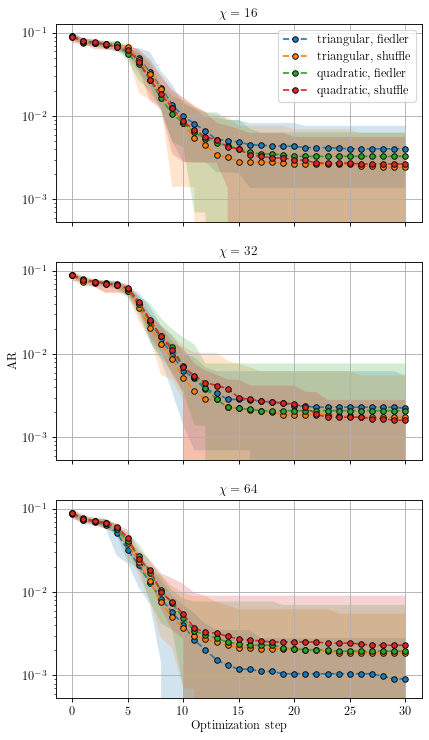

In [15]:
graph_type = "ER"
Nvertices = 100
num_instances = 10

fig, ax = plt.subplots(3, 1, sharex=True, sharey=True)
for i, chi in enumerate([16, 32, 64]):
    for architecture in ["triangular", "quadratic"]:
        for qubit_ordering in ["fiedler", "shuffle"]:
            best_energy_list = []
            avg_energy_list = []

            for idx in range(num_instances):
                data_path = os.path.join("../..", "results", "MaxCut", graph_type, f"{Nvertices}v", "MPS_fix_dt", f"ising_graph{idx}_{architecture}_chi{chi}_{qubit_ordering}/results.h5")
                with h5py.File(data_path, "r") as data:
                    samples = data["energy_samples"][:]
                    best_sample = samples.min(axis=1)
                    best_energy_list.append(best_sample)
                    avg_energy = samples.mean(axis=1)
                    avg_energy_list.append(avg_energy)

            best_energy = pandas.DataFrame(best_energy_list).T
            avg_energy = pandas.DataFrame(avg_energy_list).T

            gurobi_path = os.path.join("../..", "gurobi_results", "MaxCut", graph_type, f"{Nvertices}v", "gurobi_costs.csv")
            gurobi_cost = pandas.read_csv(gurobi_path)[:num_instances]

            # fill best_energy DataFrame such that each col has same length, by fillins NAns with the last value in that col, use padding
            best_energy = best_energy.ffill().cummin()
            avg_energy = avg_energy.ffill()

            # get AR by dividing col i by gurobi_cost["cost"][i]
            #print(best_energy.shape)
            best_AR = best_energy / gurobi_cost["cost"].values
            avg_AR = avg_energy / gurobi_cost["cost"].values


            print(best_AR.iloc[-1, :].mean())

            ax[i].semilogy(1-best_AR.mean(axis=1), marker="o", linestyle="--", markeredgecolor="black", markersize=5, markeredgewidth=.8, label=f"{architecture}, {qubit_ordering}")
            ax[i].fill_between(range(len(best_AR)), 1-best_AR.min(axis=1), 1-best_AR.max(axis=1), alpha=0.2)
            #ax[i].errorbar(range(len(best_AR)), best_AR.mean(axis=1), yerr=best_AR.std(axis=1), fmt='o', linestyle="--", markeredgecolor="black", markersize=5, markeredgewidth=.8, label=f"{architecture}, {qubit_ordering}")
            ax[i].set_title(f"$\\chi = {chi}$")
            ax[i].grid(True)
            #ax[i].set_xlim(0, 6)

        #ax[1].plot(avg_energy.mean(axis=1) / gurobi_cost["cost"].values.mean(), marker="o", linestyle="--", markeredgecolor="black", markersize=5, markeredgewidth=.8, label=f"{architecture}, {qubit_ordering}")

plt.xlabel("Optimization step")
ax[1].set_ylabel("AR")
ax[0].legend(loc = "upper right")
#plt.grid()
# increase padding
fig.set_size_inches(set_size(width='thesis', fraction=1, subplots=(3, 1)))
fig.set_dpi(80)


0.9785327197361677
0.9614983761286588
0.9835848527824169
0.985875184531045
0.9809087408676678
0.9616778498094893
0.9878962346463777
0.9892946308350782
0.9832920404197283
0.9781204390000774
0.99029004785209


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '../../results/sk_model/100v/MPS_fix_dt/ising_graph4_quadratic_chi64_shuffle/results.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

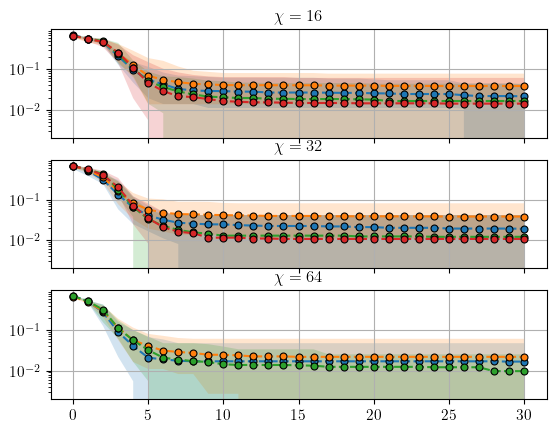

In [ ]:
graph_type = "ER"
Nvertices = 100
num_instances = 10

fig, ax = plt.subplots(3, 1, sharex=True, sharey=True)
for i, chi in enumerate([16, 32, 64]):
    for architecture in ["triangular", "quadratic"]:
        for qubit_ordering in ["fiedler", "shuffle"]:
            best_energy_list = []
            avg_energy_list = []

            for idx in range(num_instances):
                data_path = os.path.join("../..", "results", "sk_model", f"{Nvertices}v", "MPS_fix_dt", f"ising_graph{idx}_{architecture}_chi{chi}_{qubit_ordering}/results.h5")
                with h5py.File(data_path, "r") as data:
                    samples = data["energy_samples"][:]
                    best_sample = samples.min(axis=1)
                    best_energy_list.append(best_sample)
                    avg_energy = samples.mean(axis=1)
                    avg_energy_list.append(avg_energy)

            best_energy = pandas.DataFrame(best_energy_list).T
            avg_energy = pandas.DataFrame(avg_energy_list).T

            gurobi_path = os.path.join("../..", "gurobi_results", "sk_model", f"{Nvertices}v", "gurobi_costs.csv")
            gurobi_cost = pandas.read_csv(gurobi_path)[:num_instances]

            # fill best_energy DataFrame such that each col has same length, by fillins NAns with the last value in that col, use padding
            best_energy = best_energy.ffill().cummin()
            avg_energy = avg_energy.ffill()

            # get AR by dividing col i by gurobi_cost["cost"][i]
            #print(best_energy.shape)
            best_AR = best_energy / gurobi_cost["cost"].values
            avg_AR = avg_energy / gurobi_cost["cost"].values


            print(best_AR.iloc[-1, :].mean())

            ax[i].semilogy(1-best_AR.mean(axis=1), marker="o", linestyle="--", markeredgecolor="black", markersize=5, markeredgewidth=.8, label=f"{architecture}, {qubit_ordering}")
            ax[i].fill_between(range(len(best_AR)), 1-best_AR.min(axis=1), 1-best_AR.max(axis=1), alpha=0.2)
            #ax[i].errorbar(range(len(best_AR)), best_AR.mean(axis=1), yerr=best_AR.std(axis=1), fmt='o', linestyle="--", markeredgecolor="black", markersize=5, markeredgewidth=.8, label=f"{architecture}, {qubit_ordering}")
            ax[i].set_title(f"$\\chi = {chi}$")
            ax[i].grid(True)
            #ax[i].set_xlim(0, 6)

        #ax[1].plot(avg_energy.mean(axis=1) / gurobi_cost["cost"].values.mean(), marker="o", linestyle="--", markeredgecolor="black", markersize=5, markeredgewidth=.8, label=f"{architecture}, {qubit_ordering}")

plt.xlabel("Optimization step")
ax[1].set_ylabel("AR")
ax[0].legend(loc = "upper right")
#plt.grid()
# increase padding
fig.set_size_inches(set_size(width='thesis', fraction=1, subplots=(3, 1)))
fig.set_dpi(80)